In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from urllib.parse import parse_qsl, urljoin, urlparse
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip -uq "/content/drive/My Drive/Python/Google_QA_Labeling/google-quest-challenge.zip" -d "/content/drive/My Drive/Python/Google_QA_Labeling" 

In [28]:
data_dir = '/content/drive/My Drive/Python/Google_QA_Labeling/'
train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')
sample = pd.read_csv(data_dir + 'sample_submission.csv')

# train_data = pd.read_csv('/content/drive/My Drive/Python/Google_QA_Labeling/train.csv')
# test_data = pd.read_csv('/content/drive/My Drive/Python/Google_QA_Labeling/test.csv')
# sample_submission = pd.read_csv('/content/drive/My Drive/Python/Google_QA_Labeling/sample_submission.csv')

In [29]:
print('Size of train_data', train.shape)
print('Size of test_data', test.shape)
print('Size of sample_submission', sample.shape)

Size of train_data (6079, 41)
Size of test_data (476, 11)
Size of sample_submission (476, 31)


In [31]:
feature_columns = [col for col in train.columns if col not in sample.columns]
print('Feature columns: ', feature_columns)

Feature columns:  ['question_title', 'question_body', 'question_user_name', 'question_user_page', 'answer', 'answer_user_name', 'answer_user_page', 'url', 'category', 'host']


In [33]:
len([col for col in train.columns if col not in test.columns])

30

In [36]:
train0 = train.iloc[0]

print('URL           : ', train0['url'])
print('question_title: ', train0['question_title'])
print('question_body : ', train0['question_body'])

URL           :  http://photo.stackexchange.com/questions/9169/what-am-i-losing-when-using-extension-tubes-instead-of-a-macro-lens
question_title:  What am I losing when using extension tubes instead of a macro lens?
question_body :  After playing around with macro photography on-the-cheap (read: reversed lens, rev. lens mounted on a straight lens, passive extension tubes), I would like to get further with this. The problems with the techniques I used is that focus is manual and aperture control is problematic at best. This limited my setup to still subjects (read: dead insects) Now, as spring is approaching, I want to be able to shoot live insects. I believe that for this, autofocus and settable aperture will be of great help.

So, one obvious but expensive option is a macro lens (say, EF 100mm Macro) However, I am not really interested in yet another prime lens. An alternative is the electrical extension tubes.

Except for maximum focusing distance, what am I losing when using tubes 

In [37]:
print('answer        : ', train0['answer'])

answer        :  I just got extension tubes, so here's the skinny.


  ...what am I losing when using tubes...?


A very considerable amount of light!  Increasing that distance from the end of the lens to the sensor can cut your light several stops.  Combined with the fact that you'll usually shoot stopped down - expect to need to increase your ISO considerably.

The fact the macro's are usually considered very very sharp, although I believe that 70-200mm 2.8 is supposed to be quite sharp.

The ultra low distortion typical of many macros.

I wouldn't worry too much about the bokeh since the DOF will still be quite limited.

Coupled on my 50mm, a full 60mm'ish extension tube results in a DOF of about a couple inches in front of the lens.  On my 70-300, its probably around 2-3 feet in front of the lens to about a foot in front of the lens.



There are multiple answers to a single question. But only one answer is sampled in the dataset. Also, this answer might not be the most popular answer. 

### Exploratory Data Analytis

In [39]:
test.isna().sum()   # no NAN values

qa_id                 0
question_title        0
question_body         0
question_user_name    0
question_user_page    0
answer                0
answer_user_name      0
answer_user_page      0
url                   0
category              0
host                  0
dtype: int64

Train/Test category distribution


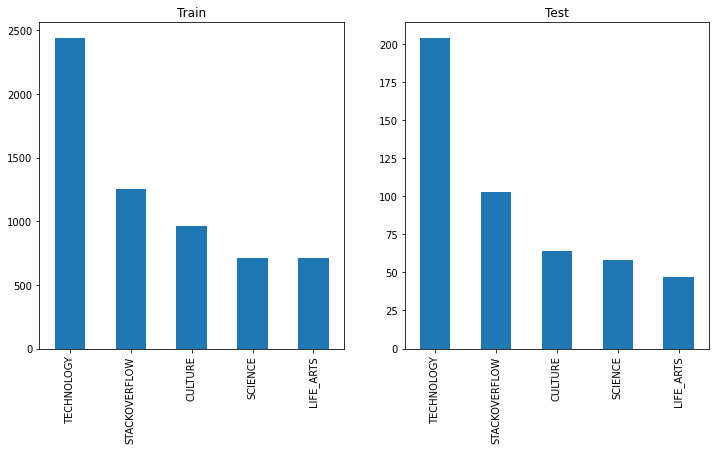

In [41]:
# Category
train_category = train['category'].value_counts()
test_category = test['category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
train_category.plot(kind='bar', ax=axes[0])
axes[0].set_title('Train')
test_category.plot(kind='bar', ax=axes[1])
axes[1].set_title('Test')
print('Train/Test category distribution')

In [42]:
# Word Count Visualization
from wordcloud import WordCloud


def plot_wordcloud(text, ax, title=None):
    wordcloud = WordCloud(max_font_size=None, background_color='white',
                          width=1200, height=1000).generate(text_cat)
    ax.imshow(wordcloud)
    if title is not None:
        ax.set_title(title)
    ax.axis("off")

Training data Word Cloud


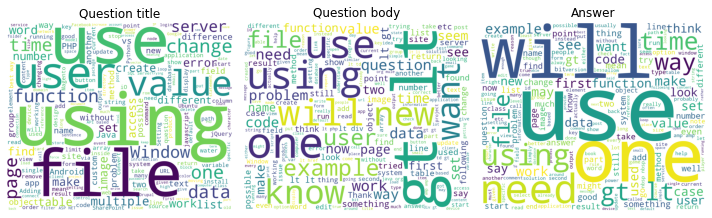

In [47]:
print('Training data Word Cloud')

fig, axes = plt.subplots(1, 3, figsize=(10, 10))

text_cat = ' '.join(train['question_title'].values)
plot_wordcloud(text_cat, axes[0], 'Question title')

text_cat = ' '.join(train['question_body'].values)
plot_wordcloud(text_cat, axes[1], 'Question body')

text_cat = ' '.join(train['answer'].values)
plot_wordcloud(text_cat, axes[2], 'Answer')

plt.tight_layout()
fig.show()

Test data Word Cloud


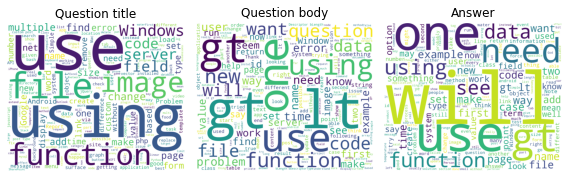

In [46]:
print('Test data Word Cloud')

fig, axes = plt.subplots(1, 3, figsize=(8, 8))

text_cat = ' '.join(test['question_title'].values)
plot_wordcloud(text_cat, axes[0], 'Question title')

text_cat = ' '.join(test['question_body'].values)
plot_wordcloud(text_cat, axes[1], 'Question body')

text_cat = ' '.join(test['answer'].values)
plot_wordcloud(text_cat, axes[2], 'Answer')

plt.tight_layout()
fig.show()
#It seems common word usage distribution is similar between train & test dataset!

In [45]:
# Correlation in 

Notes:  https://www.kaggle.com/corochann/google-quest-first-data-introduction